In [1]:
#Question1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
df= pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
for i in range(2,16):
  colname = 'x_%d'%i
  df[colname] = df['x']**i
print(df)

In [3]:
X=df.drop(['y'],axis=1)
Y=df.iloc[:,1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
betas=[]
l_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10]
r_para = [pow(10,-15), pow(10,-10), pow(10,-5), pow(10,-3), 0, 1, 10, 20]
for learning_rate in l_rate:
  for r_p in r_para:
    beta = np.zeros(X_train.shape[1]) ##+1
    for j in range(X_train.shape[1]):
      parsum=0
      for i in range(X_train.shape[0]):
        sum=0
        sum+=beta[0]
        for k in range(X_train.shape[1]):
          if k==0:
            continue
          sum+=beta[k]*X_train[i][k]
          ## 
        sum=sum-Y_train[i]   ## what is size of y_train
        sum=sum*X_train[i][j]
        ## i loop ends
      parsum=sum
      one=(parsum*learning_rate)/X_train.shape[0]   ## formula used 
      two=1-((learning_rate*r_p)/X_train.shape[0])
      beta[j]=(beta[j]*two)-one
      ## lamda loop ends
    betas.append(beta)
    ## learning rate loop ends

In [69]:
r2 = []
from sklearn.metrics import r2_score
for beta in betas:
  Y_pred_val = X_val.dot(beta)
  r2.append(r2_score(Y_val, Y_pred_val))

In [ ]:
betas=[]
l_rate=[0.0001,0.001,0.01,0.1,1,10]
r_para=[pow(10,-15),pow(10,-10),pow(10,-5),pow(10,-3),0,1,10,20]
for learning_rate in l_rate:
  for r_p in r_para:
    beta=np.zeros(X_train.shape[1])
    for j in range(X_train.shape[1]):
      parsum=0
      for i in range(X_train.shape[0]):
        sum=0
        for k in range(X_train.shape[1]):
          sum+=beta[k]*X_train[i][k]
        sum-=Y_train[i]
        sum*=X_train[i][j]
      parsum=sum
      one=(parsum*learning_rate)/X_train.shape[0]
      two=1-((learning_rate*r_p)/Y_train.shape[0])
      beta[j]=(beta[j]*two)-one
    betas.append(beta)

Question 2

(263, 20)

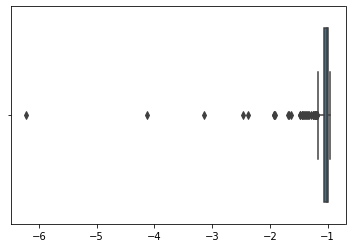

In [62]:
df=pd.read_csv("/content/ThisIsTheFile.csv")
df.shape
df1=df.dropna()
df1.shape
df2=pd.get_dummies(df1,columns=['League','Division','NewLeague'],drop_first=True)
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.05)
clf.fit_predict(df2)
dff_scores = clf.negative_outlier_factor_
import seaborn as sns
sns.boxplot(x=dff_scores);
df2.shape


In [63]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
SS=StandardScaler()
col=df2.columns
df3=SS.fit_transform(df2)
df4=pd.DataFrame(df3, columns=col)
df4.shape
df5=preprocessing.normalize(df2, axis=0)
col=df2.columns
df6=pd.DataFrame(df5, columns=col)
df6


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,0.045215,0.042742,0.029686,0.024506,0.040677,0.051741,0.098795,0.060712,0.053103,0.039633,0.040424,0.055269,0.062428,0.096651,0.014158,0.056929,0.041845,0.089803,0.086387,0.090536
1,0.068755,0.068598,0.076336,0.067392,0.077073,0.100829,0.021170,0.028587,0.029063,0.036186,0.028209,0.035511,0.043783,0.134578,0.026999,0.079700,0.042285,0.000000,0.086387,0.000000
2,0.071196,0.074402,0.084817,0.066371,0.083495,0.049088,0.077625,0.099068,0.100164,0.129237,0.104272,0.111873,0.058932,0.030586,0.003622,0.017079,0.044047,0.089803,0.000000,0.090536
3,0.046076,0.045908,0.042409,0.039822,0.044959,0.039801,0.014114,0.006971,0.006423,0.006893,0.006045,0.006141,0.005494,0.123108,0.013170,0.022771,0.008061,0.089803,0.000000,0.090536
4,0.085263,0.089177,0.016963,0.075561,0.054593,0.046434,0.077625,0.077593,0.072054,0.010913,0.063092,0.044856,0.032296,0.043126,0.138619,0.142321,0.066070,0.000000,0.086387,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.071339,0.067015,0.029686,0.066371,0.051382,0.049088,0.035284,0.047580,0.051259,0.018380,0.047728,0.041518,0.022973,0.049702,0.002963,0.017079,0.061666,0.089803,0.000000,0.090536
259,0.070622,0.071764,0.021204,0.077603,0.053523,0.124709,0.084682,0.097009,0.096094,0.022401,0.112961,0.060208,0.145665,0.047867,0.125448,0.113857,0.077082,0.000000,0.000000,0.000000
260,0.068181,0.066487,0.012723,0.062286,0.046029,0.068988,0.042341,0.029925,0.027537,0.004021,0.027327,0.012415,0.024305,0.005658,0.037206,0.039850,0.033916,0.000000,0.086387,0.000000
261,0.082248,0.075985,0.038168,0.086793,0.064227,0.103482,0.056454,0.056294,0.054502,0.055715,0.059188,0.056070,0.055269,0.200949,0.043133,0.068314,0.084570,0.000000,0.000000,0.000000


In [64]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
y=df4["Salary"]
X=df4.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred=reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
y=df6["Salary"]
X=df6.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [65]:
ridge_model=Ridge(alpha=0.5748).fit(X_train,y_train)
y_pred= ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.5748).fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.04488385406376052

Model after ridge regression performs better 

Question 3

In [9]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target
print(X.shape)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[0.001,0.01,1,10])
clf.fit(X,y)
clf.score(X,y)

from sklearn.linear_model import LassoCV
clf = LassoCV(alphas=[0.001,0.01,1,10])
clf.fit(X,y)
clf.score(X,y)

(20640, 8)
Ridge: 0.5530421056931834
Lasso: 0.20354861807563682


0.6061945447229312